In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# set parameters
smallest = 0
biggest = 1 #40
steps = 11 # 20 = quad, 10 = durcheinander Rechteck, 11 = Rechteck (Porträt)
is_gaussian = False # True
is_occ = True
pretrained = False
model_desc = "resnet34"#"densenet121" # resnet34
save_figs = True

In [23]:
# preparing experiments
if pretrained:
    run_ids = None #[353, 324, 325] #[261, 262, 263]
else:
    run_ids = [406, 407, 408] #[353, 354, 355] #[320, 321, 322] #[258, 259, 260]
    
races = ["Black", "Indian", "Latino", "Middle Eastern", "Southeast Asian", "East Asian", "White", "No Race"]
epsilons = np.linspace(start=smallest, stop=biggest, num=steps)
gaussian = "_gaussian" if is_gaussian else ""
occlusion = "occ/" if is_occ else ""
pretraining = "with_pretraining" if pretrained else "without_pretraining"

In [24]:
def plot_total_robustness(total_robs_only_white, total_robs_augmented, total_robs_original, epsilons):
    sum_white = np.sum(total_robs_only_white)
    sum_aug = np.sum(total_robs_augmented)
    sum_orig = np.sum(total_robs_original)
    print(f"only white:\t{sum_white}\t({sum_white/sum_white:.2%})")
    print(f"augmented:\t{sum_aug}\t({sum_aug/sum_white:.2%})")
    print(f"original:\t{sum_orig}\t({sum_orig/sum_white:.2%})")

    max_inc_aug = np.max((total_robs_augmented - total_robs_only_white)/total_robs_only_white)
    max_inc_orig = np.max((total_robs_original - total_robs_only_white)/total_robs_only_white)
    print(f"Max diff (augm):\t{max_inc_aug:.2%}")
    print(f"Max diff (orig):\t{max_inc_orig:.2%}")

    print(epsilons)
    print(total_robs_only_white)
    print(total_robs_augmented)
    print(total_robs_original)
    plt.plot(epsilons, total_robs_only_white, label="only")
    plt.plot(epsilons, total_robs_augmented, label="augmented")
    plt.plot(epsilons, total_robs_original, label="original")
    plt.xlabel("attack strength")
    plt.xlim(smallest, biggest)
    # plt.ylim(0.5, 1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylabel("total accuracy remaining")
    plt.legend()
    if save_figs:
        plt.savefig(f'robustness_plots/{model_desc}_{pretraining}_{biggest:.1e}_{steps}{gaussian}.png')
    plt.show()
    
    
def plot_race_robustnesses(robs_only_white, robs_augmented, robs_original, epsilons):
    for i, race in enumerate(races):
        print(race)
        rob_only_white = robs_only_white[i]
        rob_augmented = robs_augmented[i]
        rob_original = robs_original[i]

        # rob_only_white /= rob_only_white[0]
        # rob_augmented /= rob_augmented[0]
        # rob_original /= rob_original[0]
        
        sum_white = np.sum(rob_only_white)
        sum_aug = np.sum(rob_augmented)
        sum_orig = np.sum(rob_original)
        print(f"only white:\t{sum_white:.4f}\t({sum_white/sum_white:.2%})")
        print(f"augmented:\t{sum_aug:.4f}\t({sum_aug/sum_white:.2%})")
        print(f"original:\t{sum_orig:.4f}\t({sum_orig/sum_white:.2%})")

        max_inc_aug = np.max((rob_augmented - rob_only_white)/rob_only_white)
        max_inc_orig = np.max((rob_original - rob_only_white)/rob_only_white)
        print(f"Max diff (augm):\t{max_inc_aug:.2%}")
        print(f"Max diff (orig):\t{max_inc_orig:.2%}")
        
        plt.plot(epsilons, rob_only_white, label="only") #only 
        plt.plot(epsilons, rob_augmented, label="augmented") #augmented
        plt.plot(epsilons, rob_original, label="original")
        # plt.plot(epsilons, rob_augmented/rob_only_white, label="quotient")
        plt.xlim(smallest, biggest)
        # plt.ylim(0, 1)
        plt.xlabel("occlusion attack strength")
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ylabel(f"accuracy remaining") #({race})
        plt.legend()
        if save_figs:
            plt.savefig(f'robustness_plots/{model_desc}_{pretraining}_{biggest:.1e}_{steps}{gaussian}_{race}.png')
        plt.show()

only white:	13.687299728393555	(100.00%)
augmented:	11.212499618530273	(81.92%)
original:	13.299399375915527	(97.17%)
Max diff (augm):	0.00%
Max diff (orig):	0.35%
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01  ]
[1.     0.979  0.9407 0.8985 0.8478 0.7971 0.749  0.7044 0.6641 0.6281
 0.5995 0.5721 0.5468 0.5249 0.5045 0.4887 0.4737 0.4586 0.4469 0.4362
 0.4267]
[1.     0.9641 0.9044 0.8318 0.7613 0.6907 0.6332 0.58   0.5342 0.4951
 0.4548 0.424  0.3974 0.3744 0.3533 0.335  0.3196 0.3053 0.2935 0.2847
 0.2757]
[1.     0.9772 0.944  0.8941 0.8461 0.7936 0.7439 0.6993 0.6567 0.6188
 0.5828 0.5522 0.5247 0.4976 0.4723 0.4538 0.439  0.4219 0.4059 0.3933
 0.3822]


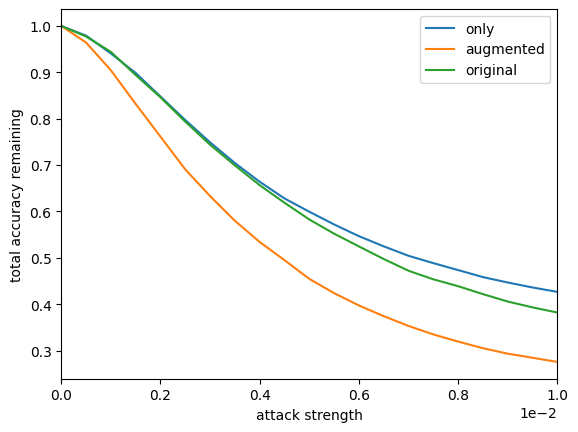

In [25]:
# plot total robustness
total_robs_only_white = np.load(f"robustness_np_arrays/{occlusion}total_rob_{run_ids[0]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
total_robs_augmented = np.load(f"robustness_np_arrays/{occlusion}total_rob_{run_ids[1]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
total_robs_original = np.load(f"robustness_np_arrays/{occlusion}total_rob_{run_ids[2]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")

# total_robs_only_white /= total_robs_only_white[0]
# total_robs_augmented /= total_robs_augmented[0]
# total_robs_original /= total_robs_original[0]

plot_total_robustness(total_robs_only_white, total_robs_augmented, total_robs_original, epsilons)

Black
only white:	8.2257	(100.00%)
augmented:	8.5755	(104.25%)
original:	9.9947	(121.51%)
Max diff (augm):	16.93%
Max diff (orig):	47.09%


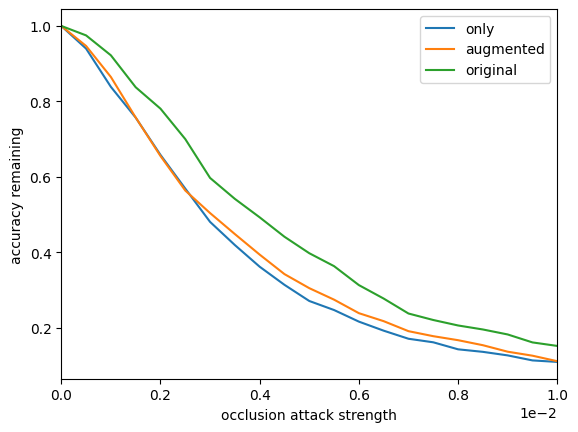

Indian
only white:	11.3441	(100.00%)
augmented:	10.3333	(91.09%)
original:	13.1206	(115.66%)
Max diff (augm):	0.00%
Max diff (orig):	43.88%


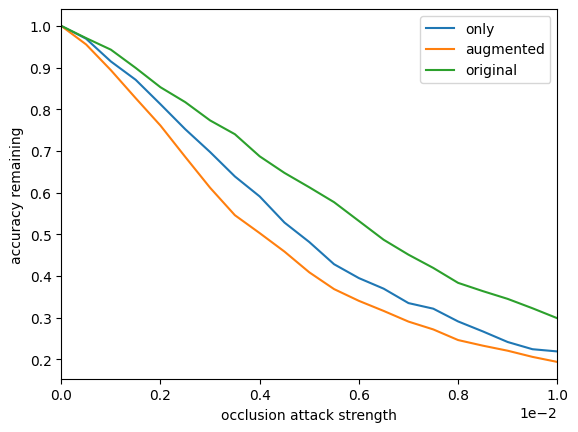

Latino
only white:	13.1748	(100.00%)
augmented:	11.4620	(87.00%)
original:	13.4880	(102.38%)
Max diff (augm):	0.00%
Max diff (orig):	7.49%


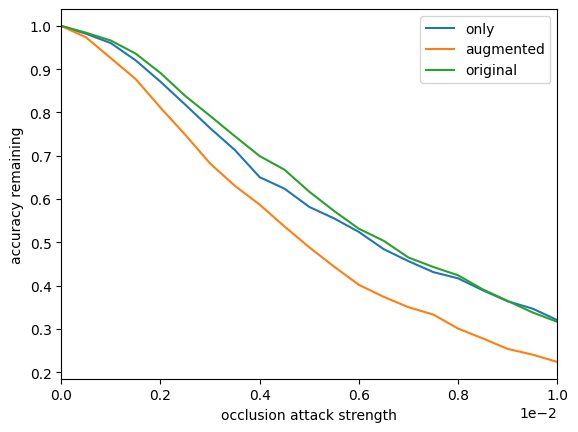

Middle Eastern
only white:	12.1765	(100.00%)
augmented:	10.4174	(85.55%)
original:	11.9776	(98.37%)
Max diff (augm):	0.00%
Max diff (orig):	2.89%


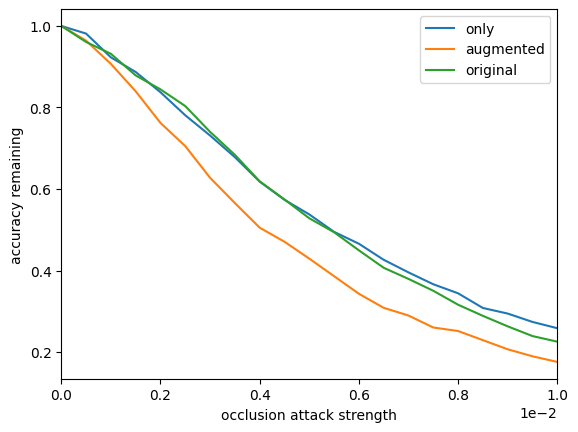

Southeast Asian
only white:	12.5687	(100.00%)
augmented:	11.0809	(88.16%)
original:	13.0959	(104.19%)
Max diff (augm):	0.00%
Max diff (orig):	10.40%


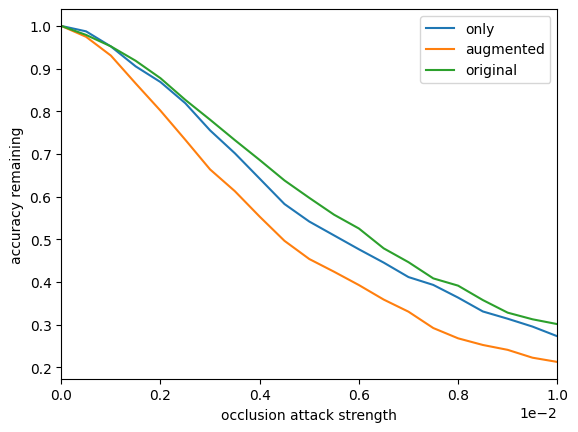

East Asian
only white:	13.2708	(100.00%)
augmented:	10.8580	(81.82%)
original:	13.3212	(100.38%)
Max diff (augm):	0.00%
Max diff (orig):	2.83%


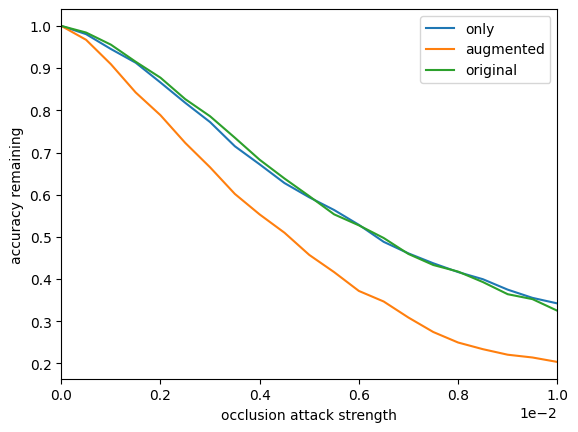

White
only white:	12.1840	(100.00%)
augmented:	9.5041	(78.00%)
original:	11.2040	(91.96%)
Max diff (augm):	0.00%
Max diff (orig):	0.00%


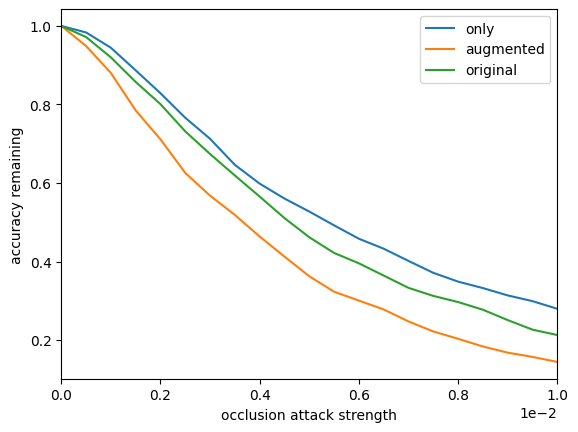

No Race
only white:	15.4888	(100.00%)
augmented:	12.1347	(78.34%)
original:	14.3151	(92.42%)
Max diff (augm):	0.00%
Max diff (orig):	0.00%


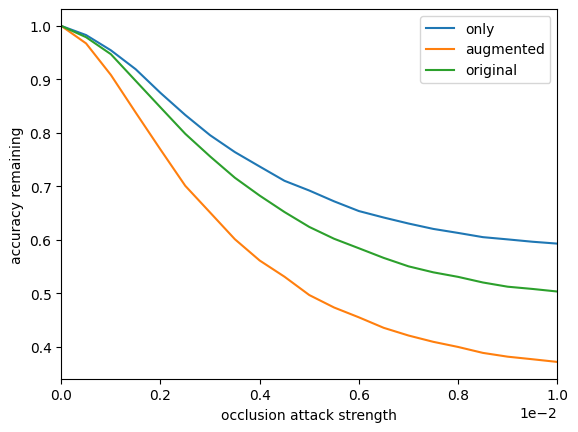

In [26]:
# plot racial robustnesses
robs_only_white = np.load(f"robustness_np_arrays/{occlusion}robs_{run_ids[0]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
# robs_augmented = np.load(f"robustness_np_arrays/{occlusion}robs_{run_ids[0]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
robs_augmented = np.load(f"robustness_np_arrays/{occlusion}robs_{run_ids[1]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
robs_original = np.load(f"robustness_np_arrays/{occlusion}robs_{run_ids[2]}_{smallest}_{biggest:.1e}_{steps}_steps{gaussian}.npy")
# pos = 0
# print(robs_only_white[:, pos])
# print(robs_augmented[:, pos])
# print(robs_original[:, pos])
plot_race_robustnesses(robs_only_white, robs_augmented, robs_original, epsilons)